In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_model_free_solution = np.loadtxt("data_model_free_solution.dat", delimiter="::")
data_model_based_solution = np.loadtxt("data_model_based_solution.dat", delimiter="::")

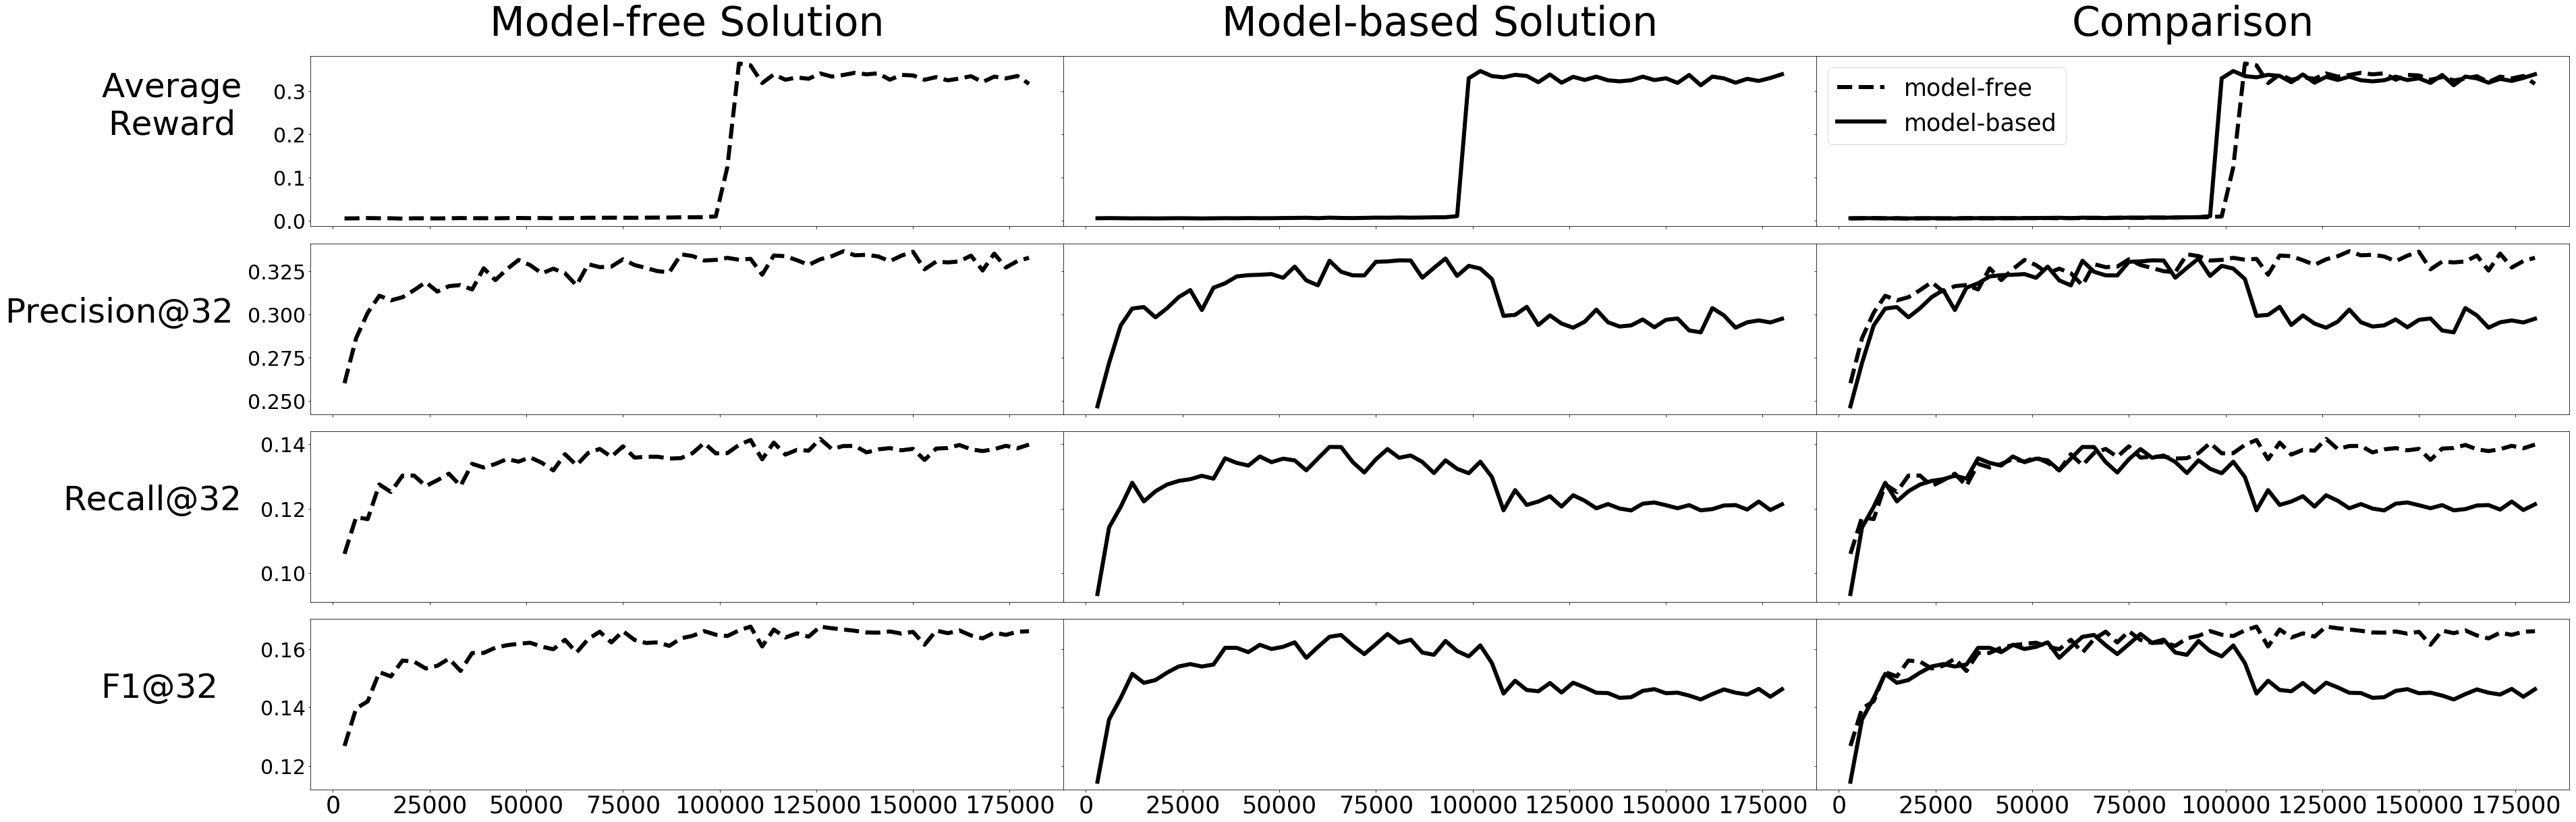

In [10]:
fig, axes = plt.subplots(4, 3, sharex='all', sharey='row')
fig.set_size_inches(60, 20)

# shared x-axis
x = np.arange(1, 61) * 3000

axes[0,0].plot(x,data_model_free_solution[:, 0], color='black', linestyle='--', linewidth=6)
axes[1,0].plot(x,data_model_free_solution[:, 1], color='black', linestyle='--', linewidth=6)
axes[2,0].plot(x,data_model_free_solution[:, 2], color='black', linestyle='--', linewidth=6)
axes[3,0].plot(x,data_model_free_solution[:, 3], color='black', linestyle='--', linewidth=6)

axes[0,1].plot(x,data_model_based_solution[:, 0], color='black', linewidth=6)
axes[1,1].plot(x,data_model_based_solution[:, 1], color='black', linewidth=6)
axes[2,1].plot(x,data_model_based_solution[:, 2], color='black', linewidth=6)
axes[3,1].plot(x,data_model_based_solution[:, 3], color='black', linewidth=6)

axes[0,2].plot(x,data_model_free_solution[:, 0], color='black', linestyle='--', linewidth=6, label='model-free')
axes[0,2].plot(x,data_model_based_solution[:, 0], color='black', linewidth=6, label='model-based')
axes[1,2].plot(x,data_model_free_solution[:, 1], color='black', linestyle='--', linewidth=6, label='model-free')
axes[1,2].plot(x,data_model_based_solution[:, 1], color='black', linewidth=6, label='model-based')
axes[2,2].plot(x,data_model_free_solution[:, 2], color='black', linestyle='--', linewidth=6, label='model-free')
axes[2,2].plot(x,data_model_based_solution[:, 2], color='black', linewidth=6, label='model-based')
axes[3,2].plot(x,data_model_free_solution[:, 3], color='black', linestyle='--', linewidth=6, label='model-free')
axes[3,2].plot(x,data_model_based_solution[:, 3], color='black', linewidth=6, label='model-based')

axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)

axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('Model-free Solution', size=60, pad=30)
axes[0,1].set_title('Model-based Solution', size=60, pad=30)
axes[0,2].set_title('Comparison', size=60, pad=30)


plt.subplots_adjust(wspace=0, hspace=0.1)
axes[0,2].legend(fontsize=35)

fig.savefig('result_figure', bbox_inches='tight')